분류 문제의 경우 군집화 사용
</br>
K-평균 군집화가 유용한 곳
- 종속변수가 없는 데이터 셋 데이터의 특성을 비교적 간단하게 살펴보는 용도
- 마케팅이나 제품 기획등의 고객 분류, 공정분류
- 지도학습
  - 종속변수를 제외하고 사용하면 탐색적 자료분석/피처엔지니어링 용도로 사용

온라인 쇼핑 고객의 구매 내역 - 추천 시스템 제공
- 고객 데이터를 분석하여 적당한 수의 그룹으로 나누고 각 그룹 별로 어떤 특성이 있는지 분석

In [8]:
# 연습용 데이터 셋
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/kyuyounglee/data/main/example_csv.csv'
data = pd.read_csv(file_url)
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


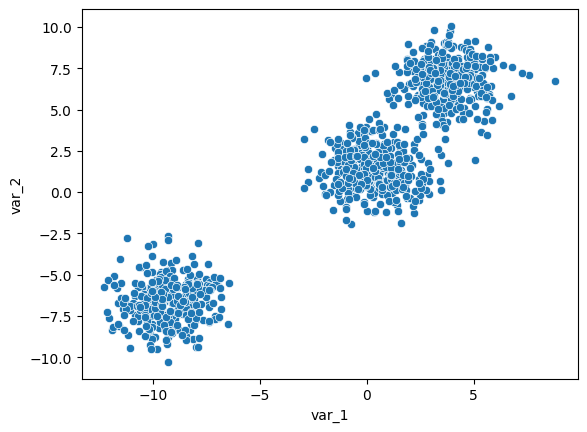

In [9]:
# 데이터의 분포를 산점도로 시각화
sns.scatterplot(data, x='var_1', y='var_2')
plt.show()

In [10]:
# 모델링 평가
from sklearn.cluster import KMeans

In [11]:
# 객체
kmodel = KMeans(n_clusters=3)
# 학습
kmodel.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
kmodel.predict(data)

array([0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2,

In [17]:
data['label'] = kmodel.predict(data)
# 시각화를 통해 데이터가 어떻게 나눠졌읍지 확인

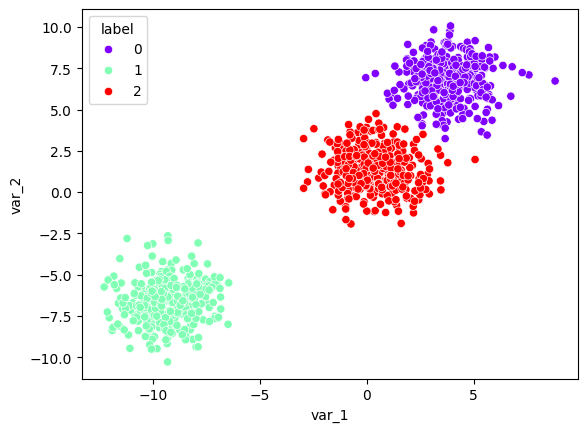

In [19]:
sns.scatterplot(data, x='var_1', y='var_2', hue='label',palette='rainbow')
plt.show()

엘보우 기법으로 최적의 K값 구하기
- 이너셔(inertia): 각 그룹에서 중심과 그 그룹에 해당하는 데이터간 거리에 대한 값
- 엘보우 : 최적의 클러스터 개수를 구하는 방법으로 클러스터 중심과 각 데이터간의 거리 기반으로 계산

In [20]:
kmodel.inertia_

3090.03323707666

In [21]:
temp_model = KMeans(n_clusters=500)
temp_model.fit(data)
temp_model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6.2749186566144495

엘보우로 적절한 클러스터 수를 찾기

In [22]:
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k, n_init='auto')
  k_model.fit(data)
  distance.append(k_model.inertia_)

In [23]:
distance

[10408.773313833866,
 3090.03323707666,
 2750.303205969692,
 2420.1491669878355,
 2214.6998866409976,
 1821.412923286271,
 1835.5171986391672,
 1373.710702333076]

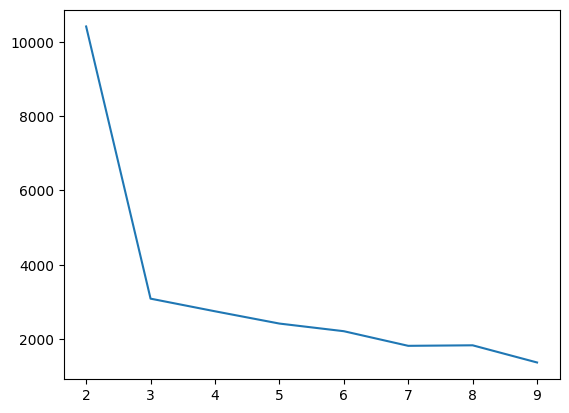

In [24]:
sns.lineplot(x=range(2,10), y=distance)
plt.show()
# k가 클수록 이니셜이 줄어든다

적용하기 - https://raw.githubusercontent.com/kyuyounglee/data/main/customer.csv

In [28]:
file_url='https://raw.githubusercontent.com/kyuyounglee/data/main/customer.csv'
customer = pd.read_csv(file_url)
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [29]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [32]:
# 카드 수 = 사용된 카드 번호는 몇 개 = 고유값 = unique?
print(len(customer.cc_num.unique()))
# 고객들이 이용한 카테고리 수?
print(len(customer.category.unique()))

100
11


In [33]:
# 고객을 암시하는 카드번호와 거래한 카테고리
# 각 고객이 어떤 범주에 얼마만큼 지불했는지 계산한 후 k-means 군집화로 비슷한 특성을 가진 고객끼리 묶어본다.

In [35]:
# 전처리 : 피처 엔지니어링
# 범주별 금액을 계산 - category 변수를 더미 변수(onehot)로 변환
customer_dummy = pd.get_dummies(customer, columns=['category'])
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,False,False,False,False,False,False,False,True,False,False,False
1,630423337322,107.23,False,False,False,True,False,False,False,False,False,False,False
2,38859492057661,220.11,True,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,False,False,True,False,False,False,False,False,False,False,False
4,375534208663984,41.96,False,False,False,False,False,False,False,True,False,False,False


In [37]:
dummy_category = customer_dummy.columns[2:]
for colname in dummy_category:
  customer_dummy[colname] = customer_dummy[colname] * customer_dummy['amt']

In [38]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.97,0.0,0.0,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.0,0.0,0.0,41.96,0.0,0.0,0.0


In [39]:
# 고객 = 카드번호 별로 각 카테고리별 사용 금액의 합
customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [40]:
# k-means는 거리 기반,, 데이터 크기가 크면 오차가 커진다 -- 스케일링이 필용함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(customer_agg),columns=customer_agg.columns,index=customer_agg.index)
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


<Axes: >

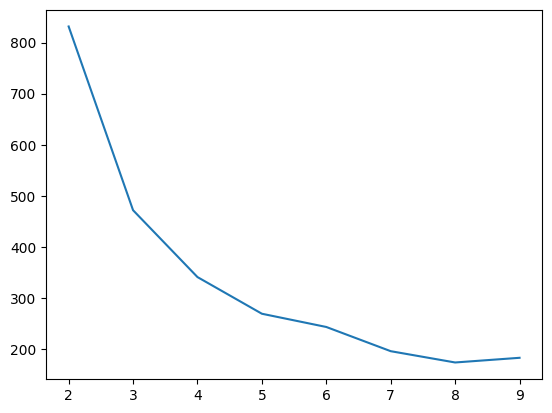

In [41]:
# 고객 데이터 모데의 최적의 k를 찾기 위해서 엘보우 시각화
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k,n_init='auto')
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  distance.append(k_model.inertia_)

sns.lineplot(x=range(2,10),y=distance)


엘보우로 판단이 어려운 경우 - 실루엣 계수
- 꺽이는 지점이 여러번 나오거니
- 완만한 곡선으로 꺽이는 부분이 없을때
</br>
- 실루엣 계수
  - 클러스터 내부의 평균거리, 최근접한 다른 클러스터의 데이터와 평균거리도 점수에 반영
  

<Axes: >

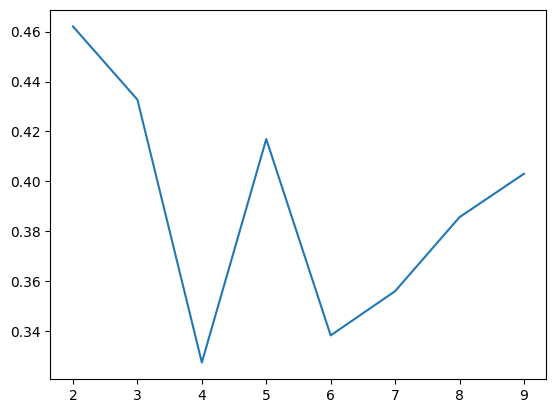

In [42]:
# 실루엣계수를 구하는 라이브러리
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k,n_init='auto')
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  silhouette.append(silhouette_score(scaled_df,labels) )

sns.lineplot(x=range(2,10),y=silhouette)
# 값이 높을수록 더 좋은 분


In [43]:
# 실루엣 계산의 단점은 시간이 오래 걸린다는 점, 비용이 증가한다는 덤
# 기본적으로는 엘보우 기법을 사용 -> 실루엣 기법 사용

최종 예측 모델 및 결과 해석

In [47]:
k_model = KMeans(n_clusters=4, n_init = 'auto')
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [48]:
scaled_df['label'] = labels

In [49]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,2
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,3
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,2


클러스터링 결과를 해석, label별로 데이터를 요약
- 전체 금액 및 범주 금액에 대해서 label별로 평균값을 구하고, 각 label에 고객이 몇명인지 조사

In [50]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,2
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,3
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,2
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0


In [51]:
# label 별로 평균 값을 구한다.
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.873254,-0.744448,-0.761970,-0.623528,-0.663638,-0.860472,-0.841604,-0.885780,-0.708370,-0.772974,-0.696862,-0.283198
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740
2,0.298361,0.131385,0.191374,1.008766,0.100261,0.444575,0.348234,0.697537,0.358052,0.452568,0.000605,-0.245254
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970


In [52]:
# label 별로 해당 카테고리에 몇명의 고객이 있는지
scaled_df_count =  scaled_df.groupby('label').count()['category_entertainment']
scaled_df_count

label
0    44
1    10
2    38
3     8
Name: category_entertainment, dtype: int64

In [53]:
scaled_df_count = scaled_df_count.rename('count')
scaled_df_count.head()

label
0    44
1    10
2    38
3     8
Name: count, dtype: int64

In [54]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [ ]:
scaled_df_all